In [1]:
%matplotlib inline

from itertools import product
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from scipy import linalg as la
from scipy import constants as cons
import pprint

import figures as fg
import operators as op
import quantum_system as qsys
import utilities as util

In [2]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])

# np.add(a, b)
a + b

array([[ 6,  8],
       [10, 12]])

In [3]:
P_j = op.build_lindblad_operator(3, 1)
# P_j

np.matmul(np.transpose(P_j), P_j)

array([[1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j]])

In [4]:
np.identity(N, dtype=complex)

NameError: name 'N' is not defined

In [5]:
N = 3
mat = op.build_lindbladian_superop(N, 0.5)
counter = 0
for i in mat:
    for j in i:
        if j != 0:
            counter += 1
            
print('have', counter)
print('should', N**2 -N)
mat.shape

have 6
should 6


(9, 9)

0.2572234074533054


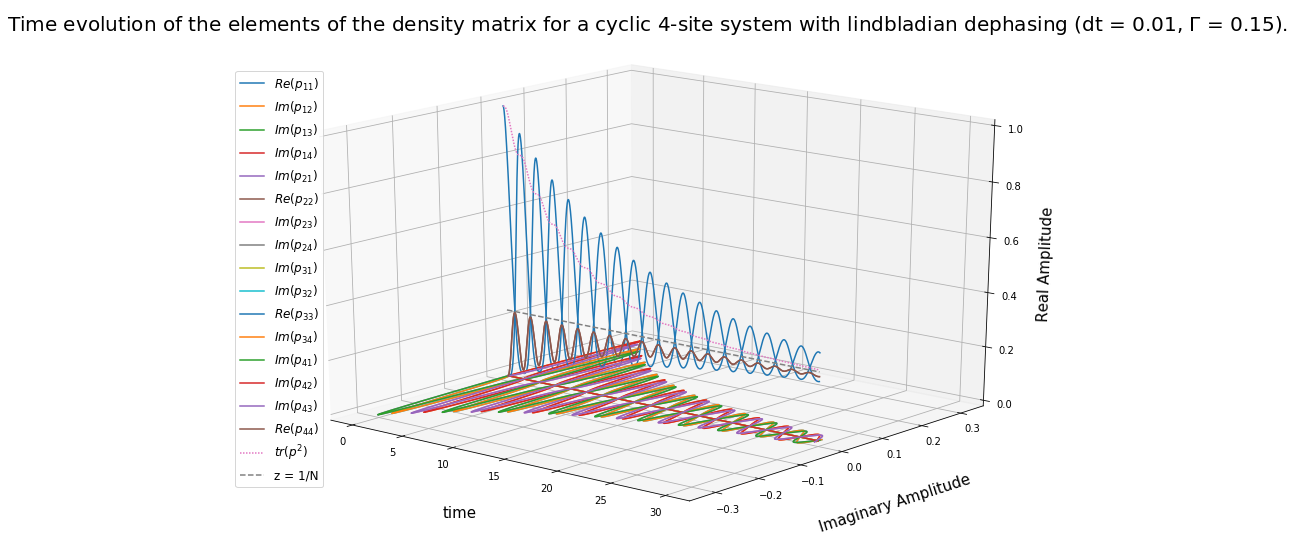

In [21]:
# Define set-up parameters
N = 4
cyclic = True
tot_time = 30. 
dt = 0.01
timesteps = int(tot_time / dt)
Gamma = 0.15
dephaser = 'lindbladian'
atomic_units = True
# elements = ['11', '12', '21', '22']
# elements = ['11', '12', '21', '22', '55']
# elements = [str(i) + str(i) for i in range(1, N+1)]
elements = [str(i) + str(j) for i, j in product(range(1, N+1), repeat=2)]

# Build Hamiltonian and initial density matrix
H = op.build_H(N, cyclic, atomic_units=atomic_units)
rho_0 = qsys.build_init_dens_matrix(N, atomic_units=atomic_units)

# Evolve the density matrix in time for some number of timesteps
evolution = qsys.evolve_rho_many_steps(N, rho_0, H, dt, timesteps, 
                                       Gamma=Gamma, dephaser=dephaser, atomic_units=atomic_units)
tr_rho_sq = fg.complex_space_time(evolution, N, cyclic, dt, dephaser, Gamma, elements=elements)
print(tr_rho_sq[-1])

In [ ]:
util.get_trace_matrix_squared(evolution[-1][1])

In [ ]:
# Create figure
# fig = plt.figure(figsize=(20, 10))
# ax = fig.subplots((1, 1, 1))

# Plot diagonals
# ax.plot(t, rho_11, c='red', ls='-', label='$p_{11}$')
# ax.plot(t, rho_22, c='green', ls='-', label='$p_{22}$')
# ax.plot(t, rho_33, c='blue', ls='-', label='$p_{33}$')
# Plot off-diagonals
# ax.plot(t, rho_12, c='black', ls='-', label='$p_{12}$')
# ax.plot(t, rho_21, c='yellow', ls='--', label='$p_{21}$')
# ax.plot(t, rho_13, c='black', ls='-', label='$p_{13}$')
# ax.plot(t, rho_31, c='yellow', ls='--', label='$p_{31}$')
# ax.plot(t, rho_23, c='black', ls='-', label='$p_{23}$')
# ax.plot(t, rho_32, c='yellow', ls='--', label='$p_{32}$')
# Plot square trace
# ax.plot(t, tr_rho_sq, c='purple', ls='-', label='$tr(p^2)$')

# Format plot
# plt.legend(loc='best', fontsize='x-large')
# plt.xlabel('time', size='20')
# plt.ylabel('Probability Amplitude', size='20')
# plt.hlines(1/N, t[0], t[-1], color='gray', linestyle='--')
# plt.show()